# Inbasekaran Perumal 
## EC802
## Low power VLSI 
## Assignment 1
### Jan-22-2023


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def get_delay(data):
    diff = np.abs(data[2000:,1]-2.5)
    index = np.argmin(diff)
    return (data[:,0][2000 + index] - 2.0e-09)*1e9

In [3]:
data1 = np.genfromtxt('./01_vtc/output/1/data.txt')
data2 = np.genfromtxt('./01_vtc/output/2/data.txt')
data3 = np.genfromtxt('./01_vtc/output/3/data.txt')

```SPICE
 * nand

.include ./t14y_tsmc_025_level3.txt

*** netlist
mpa vdd vin_a vout vdd cmosp l = 1u w = 10u
mpb vdd vin_b vout vdd cmosp l = 1u w = 10u

mna vout vin_a vdd_b 0 cmosn l = 1u w = 10u
mnb vdd_b vin_b 0 0 cmosn l = 1u w = 10u
c_load vout 0 1f

** paracitic
C_out vout 0 14fF
C_int vdd_b 0 6fF



vdd vdd 0 5
vin_b vin_b 0 PULSE(0 5 0 0 0 2n 4n)
vin_a vin_a 0 PULSE(5 5  0 0 0 2n 4n)

.control
	tran .001n 4n uic
	run
	echo $plots
	plot tran1.v(vout)
	hardcopy output/3/vtc v(vout)
	wrdata output/3/data.txt v(vout) v(vin_a) v(vin_b) 
.endc


.end
```

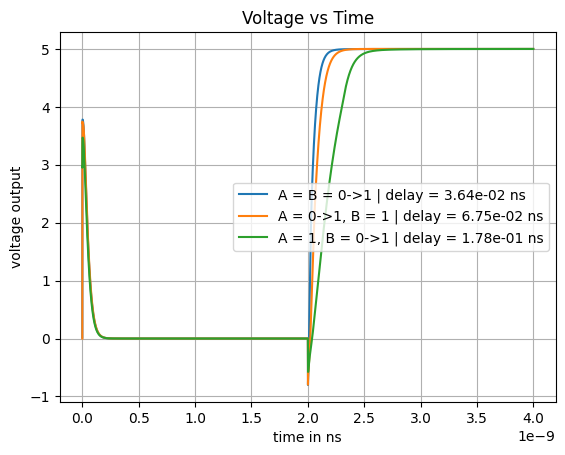

In [26]:
# plot the first data set
plt.plot(data1[:,0], data1[:,1], label=f'A = B = 0->1 | delay = {get_delay(data1):.2e} ns')
# plot the second data set
plt.plot(data2[:,0], data2[:,1], label=f'A = 0->1, B = 1 | delay = {get_delay(data2):.2e} ns')
# plot the third data set
plt.plot(data3[:,0], data3[:,1], label=f'A = 1, B = 0->1 | delay = {get_delay(data3):.2e} ns')

# add a legend
plt.legend()

plt.xlabel('time in ns')
plt.ylabel('voltage output')
plt.title('Voltage vs Time')
plt.grid()
plt.show()

Propagation delay in a CMOS logic gate depends on the input patterns because the input patterns determine the amount of current flowing through the transistors in the gate.

In a CMOS logic gate, the input patterns determine the state of the transistors that are used to drive the output. When a CMOS gate receives a logical "1" input, the corresponding p-type transistor is turned on and the n-type transistor is turned off. This allows a large current to flow through the p-type transistor and drive the output to a logical "1" state. However, when the input pattern is a logical "0", the corresponding p-type transistor is turned off and the n-type transistor is turned on. This causes a large current to flow through the n-type transistor, which pulls the output to a logical "0" state.

The time it takes for the output to change states is known as the propagation delay. If the input pattern changes from a logical "0" to a logical "1" or vice versa, the gate has to switch the current flowing through the transistors, this switching process takes some time, which is the propagation delay. If a logical "1" is already present and another logical "1" is applied as input, then there is no need for the gate to switch the current flowing through the transistors, hence the delay is less in this case.

Additionally, the propagation delay also depends on other factors such as the size of the transistors, the voltage supply, and the load capacitance at the output.

Hence, the input patterns can affect the propagation delay of a CMOS logic gate because they determine the state of the transistors and the amount of current flowing through them.

In [30]:
data1 = np.genfromtxt('./02_delay/output/1/data.txt')
data2 = np.genfromtxt('./02_delay/output/2/data.txt')
data3 = np.genfromtxt('./02_delay/output/3/data.txt')

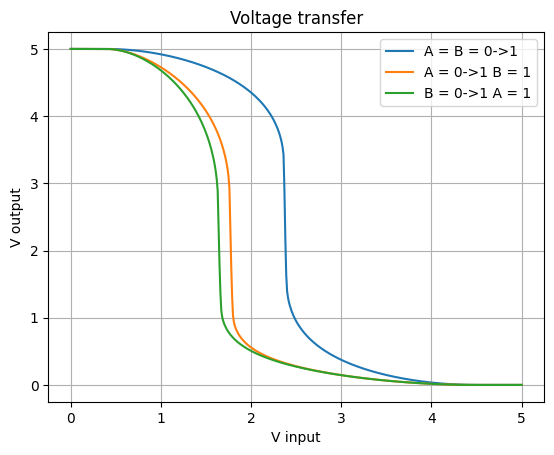

In [35]:
# plot the first data set
plt.plot(data1[:,0],data1[:,1], label=f'A = B = 0->1')
plt.plot(data2[:,0],data2[:,1], label=f'A = 0->1 B = 1')
plt.plot(data3[:,0],data3[:,1], label=f'B = 0->1 A = 1')
# add a legend
plt.legend()

plt.xlabel('V input')
plt.ylabel('V output')
plt.title('Voltage transfer')
plt.grid()
plt.show()

```SPICE
 * nand

.include ./t14y_tsmc_025_level3.txt

*** netlist
mpa vdd vin_a vout vdd cmosp l = 1u w = 10u
mpb vdd vin_b vout vdd cmosp l = 1u w = 10u

mna vout vin_a vdd_b 0 cmosn l = 1u w = 10u
mnb vdd_b vin_b 0 0 cmosn l = 1u w = 10u
c_load vout 0 1f

** paracitic
C_out vout 0 14fF
C_int vdd_b 0 6fF



vdd vdd 0 5
vin_b vin_b 0 PULSE(0 5 0 0 0 2n 4n)
vin_a vin_a 0 PULSE(5 5  0 0 0 2n 4n)

.control
	tran .001n 4n uic
	run
	echo $plots
	plot tran1.v(vout)
	hardcopy output/3/vtc v(vout)
	wrdata output/3/data.txt v(vout) v(vin_a) v(vin_b) 
.endc


.end

```

The voltage transfer characteristics (VTC) of a CMOS logic gate vary for different input patterns because the behavior of the transistors in the gate depends on the input voltage levels.

In a CMOS gate, the output voltage is determined by the relative conductances of the two transistors, the nMOS and the pMOS transistors. The nMOS transistor conducts when the input voltage is high, and the pMOS transistor conducts when the input voltage is low. The relative conductances of the two transistors determine the output voltage of the gate.

For a given input voltage, the conductances of the transistors are determined by their threshold voltages and the input voltage levels. The threshold voltage is the voltage at which a transistor starts conducting. It is a key parameter in determining the VTC of the gate.

As the input voltage changes, the conductances of the transistors change, which in turn affects the output voltage. This is why the VTC of a CMOS gate varies for different input patterns.

Another factor that affects the VTC is the load capacitance which is the capacitance connected to the output of the gate. As the load capacitance increases, the charging and discharging of the load capacitance takes more time, which in turn increases the propagation delay and affects the VTC of the gate.

To summarize, the VTC of a CMOS gate varies for different input patterns because the behavior of the transistors in the gate depends on the input voltage levels and the threshold voltage, which in turn affects the conductances of the transistors and the output voltage of the gate.